In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.figure()
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

In [2]:
plt.rcParams.update({"font.size": 16})
# plt.rcParams.update({'font.size':10})

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [4]:
import pandas as pd
import os

In [5]:
import phenom

In [6]:
import lal

In [7]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [8]:
import os
os.sys.path.append("/Users/sebastian.khan/personal/git/stk/ml/waveforms/oct2022/uncertainty")
import collocation as col

In [9]:
import sympy
# sympy.init_printing()
x_sym, a_sym, om_rd = sympy.symbols('x_sym a_sym om_rd')

# get data

In [151]:
def gen_data(N=100):
    x = np.linspace(0, 1, 100)
    y = x**2 * np.sin(x/0.45)
    return x, y

In [152]:
X, y = gen_data()

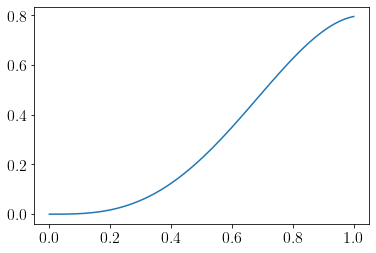

In [153]:
plt.plot(X, y)

In [154]:
iy = IUS(X, y)

# ansatz

In [165]:
collocation_points={0:[0, 0.5, 1], 1:[0, 1]}
# collocation_points={0:[0, 1]}
rhs={d:np.array(list(map(iy.derivative(d), collocation_points[d]))) for d in collocation_points.keys()}
sub_dict=None

In [166]:
n_terms = len(np.concatenate([v for k, v in collocation_points.items()]))
n_terms

5

In [167]:
ansatz = np.sum([x_sym**power for power in range(n_terms)])
# ansatz = 1 + x_sym**2 * sympy.sin(x_sym/0.45)

In [168]:
ansatz

x_sym**4 + x_sym**3 + x_sym**2 + x_sym + 1

In [169]:
rhs

{0: array([3.96895988e-23, 2.24048052e-01, 7.95220057e-01]),
 1: array([-3.97490895e-07,  2.43056100e-01])}

In [170]:
ps=dict(
    collocation_points=collocation_points,
    rhs=rhs,
    ansatz=ansatz,
    sub_dict=sub_dict,
)

In [171]:
cm = col.CollocationModelNew(**ps)

In [175]:
cm.information_matrix

array([[1.    , 0.    , 0.    , 0.    , 0.    ],
       [1.    , 0.5   , 0.25  , 0.125 , 0.0625],
       [1.    , 1.    , 1.    , 1.    , 1.    ],
       [0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 1.    , 2.    , 3.    , 4.    ]])

In [172]:
cm.coeffs

array([ 3.96895988e-23, -3.97490895e-07, -1.48273762e-01,  3.23437284e+00,
       -2.29087863e+00])

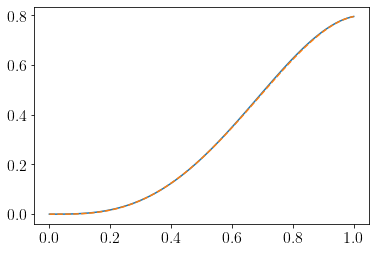

In [173]:
plt.plot(X, y)
plt.plot(X, cm.predict(X), ls='--')

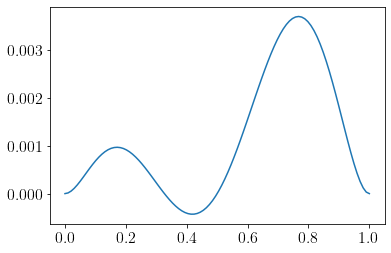

In [174]:
plt.plot(X, y-cm.predict(X))